<a href="https://colab.research.google.com/github/diana-rahma/Machine-Learning_Ganjil25_11/blob/main/Tugas_Kelompok_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Library

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Dataset
df = pd.read_csv("Time-Wasters on Social Media.csv")

print("Data sebelum preprocessing:")
print(df.head())
print("\nInfo awal:")
print(df.info())

# Cek Missing Value
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())

df = df.dropna(thresh=len(df.columns) - 3)

for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Konversi Kolom ke Numerik (Label Encoding)
label_enc = LabelEncoder()

cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col].astype(str))

print("\nData setelah encoding kategorikal:")
print(df[cat_cols].head())

selected_features = [
    'Total Time Spent',
    'Number of Sessions',
    'Time Spent On Video',
    'Number of Videos Watched',
    'Addiction Level',
    'Self Control',
    'ProductivityLoss',
    'Satisfaction'
]

selected_features = [col for col in selected_features if col in df.columns]
data_cluster = df[selected_features]

print("\nKolom yang digunakan untuk clustering:")
print(data_cluster.head())

# Standarisasi Data Numerik
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cluster)

# Ubah kembali ke DataFrame agar mudah dibaca
scaled_df = pd.DataFrame(scaled_data, columns=selected_features)

print("\nData setelah standarisasi:")
print(scaled_df.head())

# Simpan Data Preprocessed
scaled_df.to_csv("Preprocessed_TimeWasters.csv", index=False)
print("\n Preprocessing selesai. Data tersimpan di 'Preprocessed_TimeWasters.csv'")


Data sebelum preprocessing:
   UserID  Age  Gender       Location  Income   Debt  Owns Property  \
0       1   56    Male       Pakistan   82812   True           True   
1       2   46  Female         Mexico   27999  False           True   
2       3   32  Female  United States   42436  False           True   
3       4   60    Male         Barzil   62963   True          False   
4       5   25    Male       Pakistan   22096  False           True   

      Profession Demographics   Platform  ...  ProductivityLoss  Satisfaction  \
0       Engineer        Rural  Instagram  ...                 3             7   
1         Artist        Urban  Instagram  ...                 5             5   
2       Engineer        Rural   Facebook  ...                 6             4   
3  Waiting staff        Rural    YouTube  ...                 3             7   
4        Manager        Urban     TikTok  ...                 8             2   

      Watch Reason  DeviceType       OS  Watch Time  Self 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


In [ ]:
df = pd.read_csv("Time-Wasters on Social Media.csv")
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [ ]:
features = ['Total Time Spent', 'Number of Sessions', 'Time Spent On Video',
            'Number of Videos Watched', 'Addiction Level',
            'Self Control', 'ProductivityLoss', 'Satisfaction']
data = df[features]


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


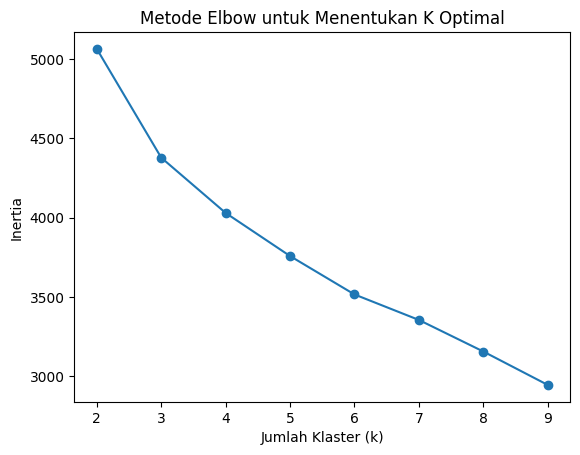

In [ ]:
inertia = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)


In [ ]:
score = silhouette_score(scaled_data, df['KMeans_Cluster'])
print(f"Silhouette Score (K-Means): {score:.3f}")


Silhouette Score (K-Means): 0.211


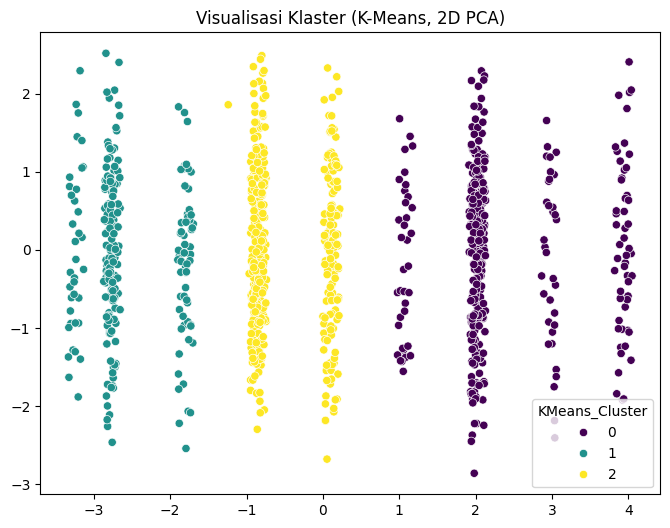

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('Visualisasi Klaster (K-Means, 2D PCA)')
plt.show()


# DBSCAN

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)


In [ ]:
df['DBSCAN_Cluster'].value_counts()


,count
DBSCAN_Cluster,
0,982
-1,18


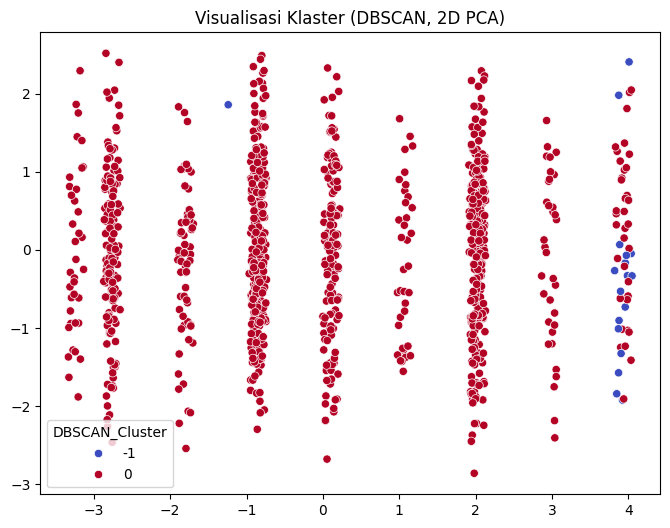

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=df['DBSCAN_Cluster'], palette='coolwarm')
plt.title('Visualisasi Klaster (DBSCAN, 2D PCA)')
plt.show()


In [ ]:
cluster_summary = df.groupby('KMeans_Cluster')[features].mean().round(2)
cluster_summary


,Total Time Spent,Number of Sessions,Time Spent On Video,Number of Videos Watched,Addiction Level,Self Control,ProductivityLoss,Satisfaction
KMeans_Cluster,,,,,,,,
0,152.11,9.67,14.99,26.01,5.31,4.69,2.69,7.31
1,149.90,10.79,14.76,26.24,0.26,9.74,7.90,2.10
2,151.68,9.85,15.08,24.00,2.39,7.61,5.62,4.38


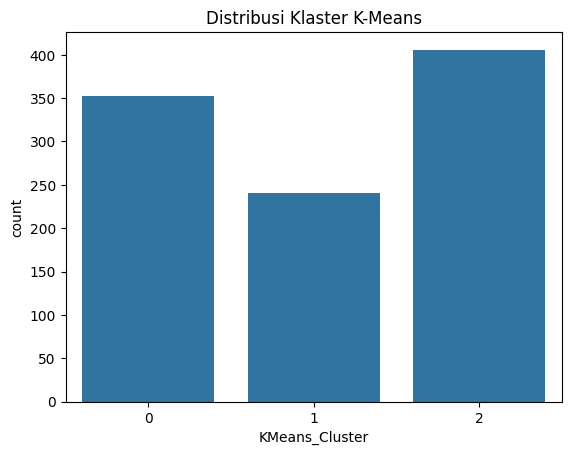

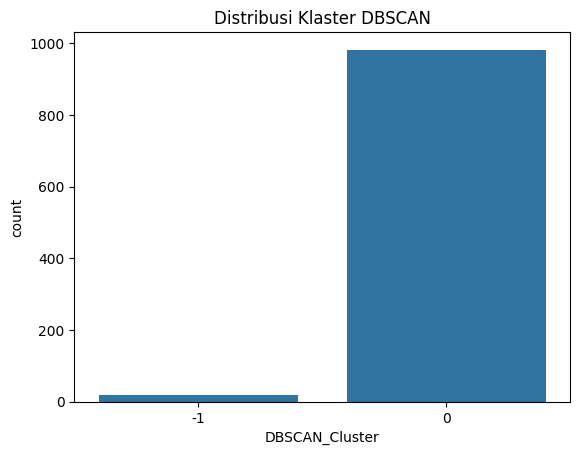

In [ ]:
sns.countplot(x='KMeans_Cluster', data=df)
plt.title('Distribusi Klaster K-Means')
plt.show()

sns.countplot(x='DBSCAN_Cluster', data=df)
plt.title('Distribusi Klaster DBSCAN')
plt.show()
